In [13]:
# Import the Qiskit SDK
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
from qiskit.tools.visualization import plot_histogram, plot_state_city
from math import pi

In [14]:
# Numbers of registers that will be used in the circuit
numbers_of_registers = 3

# Create a Quantum Register with 2 qubits.
q = QuantumRegister(numbers_of_registers)

# Create a Classical Register with 2 bits.
c = ClassicalRegister(numbers_of_registers)

# Create a Quantum Circuit
qc = QuantumCircuit(q, c)

# Add a H gate on qubit 0, putting this qubit in superposition (divider).
qc.h(q)

# Applying oracle
qc.h(q[0])
qc.ccx(q[2], q[1], q[0])
qc.h(q[0])

# Applying controlled_u_1
qc.z(q[0])

# Add a H gate on qubit 0, putting this qubit in superposition (combiner).
qc.h(q[0])

# Add a Measure gate to see the state.
qc.measure(q, c)

In [21]:
# See a list of available local simulators
# print("Aer backends: ", Aer.backends())

# Compile and run the Quantum circuit on a simulator backend
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim)
result_sim = job_sim.result()

In [22]:
# Show the results
print("Simulation status: ", result_sim.status)
# print(result_sim.get_counts(qc))
print("get_counts")
print(result_sim.get_counts())

Simulation status:  COMPLETED
get_counts
{'101': 270, '011': 243, '001': 244, '110': 267}


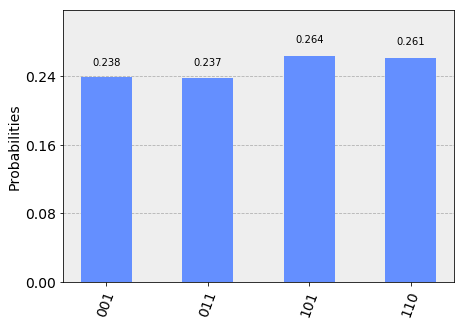

In [23]:
# Plot graph
plot_histogram(result_sim.get_counts(), title='')